In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd

In [2]:
# Reading the CSV file
file_path = './data.csv'  # File path
data = pd.read_csv(file_path)

In [3]:
# Checking for missing values
print(data.isna().sum().any())  # Returns True if there are any missing values in the dataset

False


In [4]:
# Checking for duplicate rows
print(data.duplicated().sum())  # Counts the number of duplicate rows in the dataset

0


In [5]:
# Target column
target_column = 'Adj Close'

# Selecting specified columns 
selected_features = ['GDX_Open', 'GDX_Low', 'GDX_High', 'GDX_Adj Close', 'GDX_Close', 'GDX_Volume', 'PLD_Price', 'PLD_Low', 'PLD_High', 'PLD_Open', 'SF_Low', 'SF_High']
X = data.drop(columns=['Adj Close', 'Date', 'Open', 'Close', 'Low', 'High']) 
X = data[selected_features] 
y = data[target_column]  # Assign the target variable

In [6]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Creating a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)  # Training the model on the training dataset

# Making predictions
y_pred = model.predict(X_test)

In [8]:
# Evaluating model performance
mse = mean_squared_error(y_test, y_pred)  # Calculating the Mean Squared Error
r2 = r2_score(y_test, y_pred)  # Calculating the R-squared score
mae = mean_absolute_error(y_test, y_pred)

# Printing evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 10.425294560793292
R2 Score: 0.9665511224615685
Mean Absolute Error: 2.4532606932073002


# Scatter plot

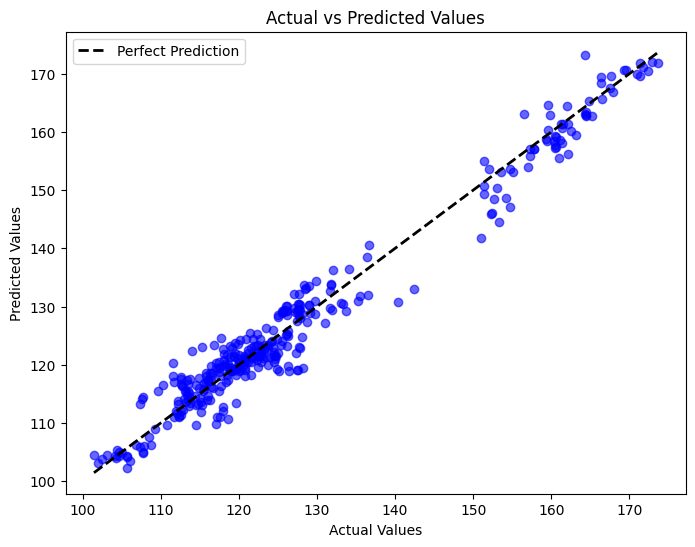

In [9]:
import matplotlib.pyplot as plt

# Scatter plot: Actual values vs Predicted values
plt.figure(figsize=(8, 6))

# Plotting the actual vs predicted values as scatter points
plt.scatter(y_test, y_pred, alpha=0.6, color='b')

# Adding a reference line to represent perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')

# Setting axis labels
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Adding a title to the plot
plt.title("Actual vs Predicted Values")

# Displaying the legend
plt.legend()

# Showing the plot
plt.show()


# Error Analysis

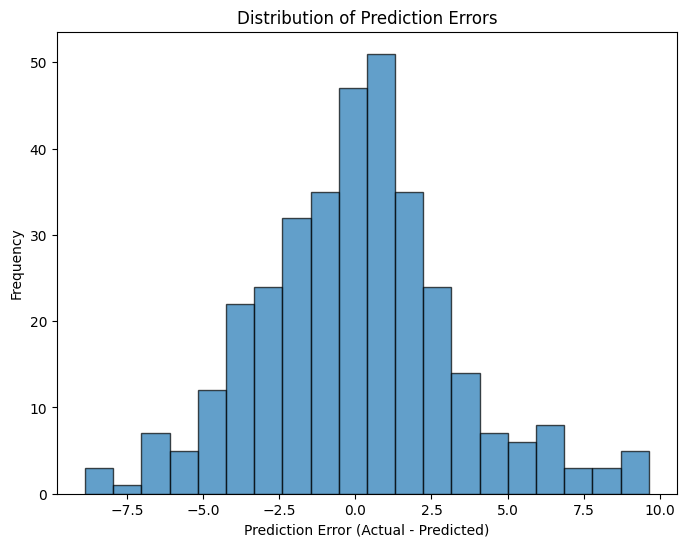

In [10]:
# Calculating residuals (errors)
residuals = y_test - y_pred

# Histogram: Distribution of residuals (errors)
plt.figure(figsize=(8, 6))

# Plotting the histogram of residuals
plt.hist(residuals, bins=20, edgecolor='k', alpha=0.7)

# Setting axis labels
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.ylabel("Frequency")

# Adding a title to the plot
plt.title("Distribution of Prediction Errors")

# Displaying the plot
plt.show()


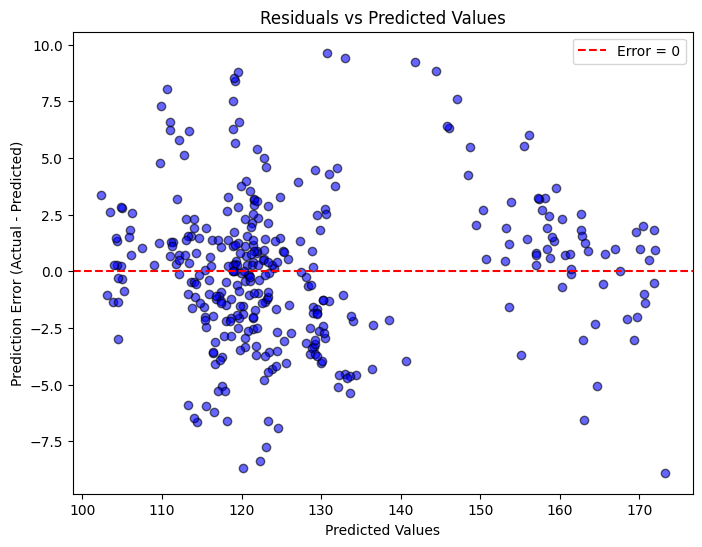

In [11]:
# Scatter plot: Residuals vs Predicted values
plt.figure(figsize=(8, 6))

# Plotting the residuals against the predicted values
plt.scatter(y_pred, residuals, alpha=0.6, color='blue', edgecolor='k')

# Adding a horizontal line at y=0 to represent zero error
plt.axhline(0, color='red', linestyle='--', label='Error = 0')

# Setting axis labels
plt.xlabel("Predicted Values")
plt.ylabel("Prediction Error (Actual - Predicted)")

# Adding a title to the plot
plt.title("Residuals vs Predicted Values")

# Displaying the legend
plt.legend()

# Showing the plot
plt.show()
